Automated Leaf Classification using Machine Learning and Image Processing

Md Nahin Islam

U00899990

In [1]:
import zipfile
import pandas as pd
import os

# Upload `leaf.zip` manually via Colab file upload
from google.colab import files
uploaded = files.upload()

# Unzip the uploaded file
with zipfile.ZipFile("leaf.zip", "r") as zip_ref:
    zip_ref.extractall("leaf_dataset")

# Check files
os.listdir("leaf_dataset")


Saving leaf.zip to leaf.zip


['ReadMe.pdf', 'BW', 'leaf.csv', 'RGB']

In [2]:
# Load the CSV file
csv_path = "leaf_dataset/leaf.csv"
leaf_df = pd.read_csv(csv_path)

# Separate features and labels
X = leaf_df.iloc[:, 2:]  # 14 features
y = leaf_df.iloc[:, 0]   # Class label

# Split into train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


✅ SVM Accuracy: 0.6911764705882353

Classification Report:
               precision    recall  f1-score   support

           1       0.67      1.00      0.80         2
           2       0.00      0.00      0.00         2
           3       0.67      1.00      0.80         2
           4       0.00      0.00      0.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       0.50      0.67      0.57         3
          10       1.00      0.67      0.80         3
          11       1.00      1.00      1.00         3
          12       1.00      0.50      0.67         2
          13       0.50      0.67      0.57         3
          14       0.00      0.00      0.00         2
          15       1.00      1.00      1.00         2
          22       1.00      0.67      0.80         3
          23       1.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


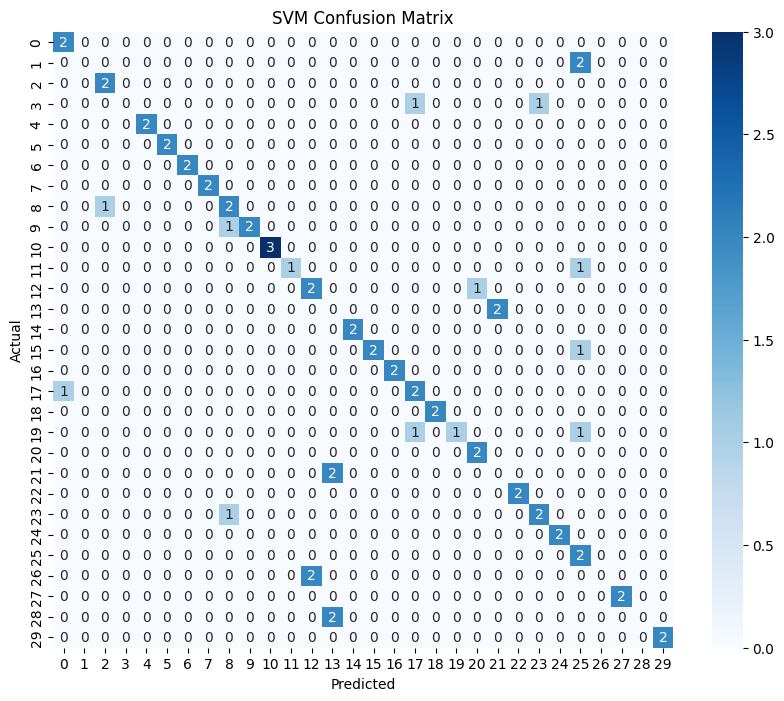

In [4]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train the SVM model
svm_clf = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_clf.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_svm = svm_clf.predict(X_test_scaled)

# Evaluate
print("✅ SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap="Blues")
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


✅ Random Forest Accuracy: 0.8235294117647058

Classification Report:
               precision    recall  f1-score   support

           1       0.67      1.00      0.80         2
           2       0.33      1.00      0.50         2
           3       1.00      1.00      1.00         2
           4       0.00      0.00      0.00         2
           5       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       1.00      0.50      0.67         2
          13       0.75      1.00      0.86         3
          14       0.67      1.00      0.80         2
          15       1.00      1.00      1.00         2
          22       1.00      0.33      0.50         3
          2

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


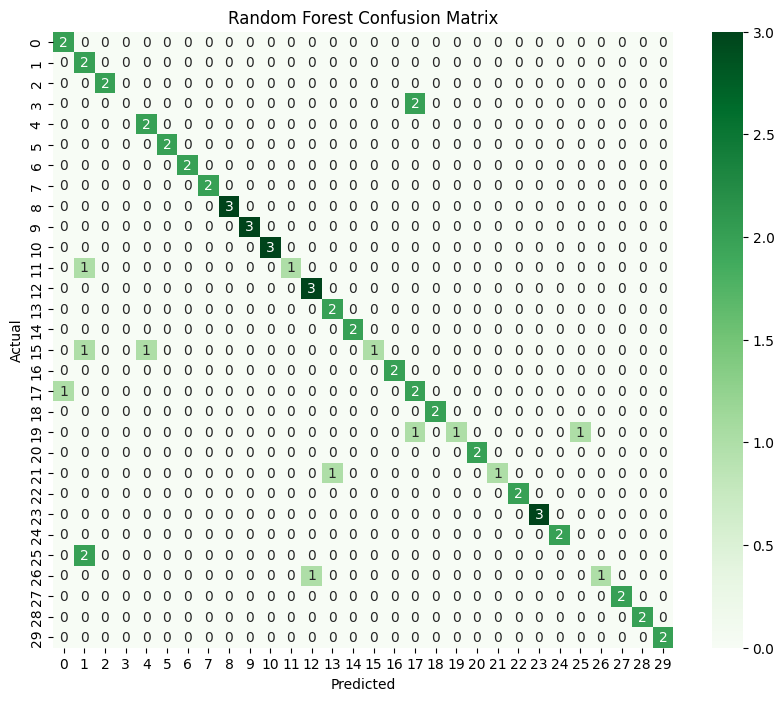

In [6]:
from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_rf = rf_clf.predict(X_test_scaled)

print("✅ Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap="Greens")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [7]:
import os
import torch
import torchvision
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


In [21]:
# Transform images to 128x128, convert to tensor, normalize
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5]*3, std=[0.5]*3)
])


# Load data from RGB folder
data_dir = "leaf_dataset/RGB"
dataset = datasets.ImageFolder(root=data_dir, transform=transform)

# Split into train/test (80/20)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16)


In [9]:
class LeafCNN(nn.Module):
    def __init__(self):
        super(LeafCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(32 * 32 * 32, 128)
        self.fc2 = nn.Linear(128, 40)  # 40 classes

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))   # 64x64
        x = self.pool(F.relu(self.conv2(x)))   # 32x32
        x = x.view(-1, 32 * 32 * 32)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

cnn_model = LeafCNN()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
cnn_model.to(device)


LeafCNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=32768, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=40, bias=True)
)

In [10]:
#Train CNN
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn_model.parameters(), lr=0.001)

# Training loop
num_epochs = 5
for epoch in range(num_epochs):
    cnn_model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = cnn_model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss:.4f}, Accuracy: {100 * correct / total:.2f}%")


Epoch [1/5], Loss: 85.9450, Accuracy: 5.37%
Epoch [2/5], Loss: 72.4672, Accuracy: 19.49%
Epoch [3/5], Loss: 52.9827, Accuracy: 42.66%
Epoch [4/5], Loss: 32.3990, Accuracy: 61.30%
Epoch [5/5], Loss: 21.7853, Accuracy: 71.19%


In [11]:
cnn_model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = cnn_model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"✅ CNN Test Accuracy: {100 * correct / total:.2f}%")


✅ CNN Test Accuracy: 59.55%


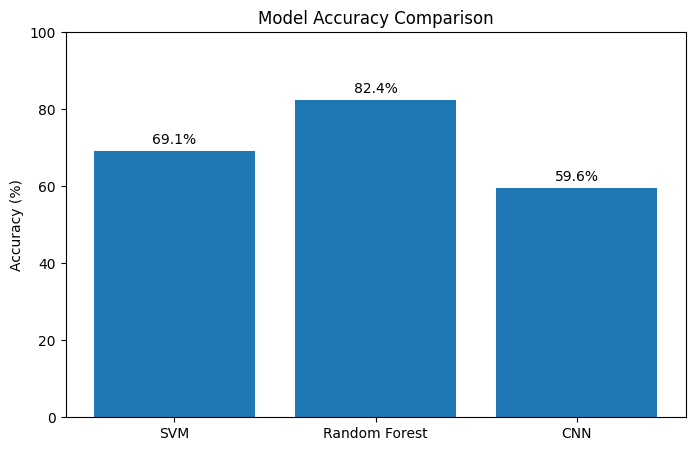

In [12]:
import matplotlib.pyplot as plt

# Accuracy values
models = ['SVM', 'Random Forest', 'CNN']
accuracies = [69.1, 82.4, 59.6]

# Plot
plt.figure(figsize=(8, 5))
bars = plt.bar(models, accuracies)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy (%)")
plt.ylim(0, 100)

# Add value labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 1, f"{yval:.1f}%", ha='center', va='bottom')

plt.show()


In [22]:
# 📊 Initialize Tracking Lists
train_acc = []
train_loss = []
val_acc = []
val_loss = []

# 🔁 CNN Training + Validation
num_epochs = 20
for epoch in range(num_epochs):
    cnn_model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = cnn_model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    acc = 100 * correct / total
    train_loss.append(running_loss)
    train_acc.append(acc)

    # 🔍 Validation
    cnn_model.eval()
    val_correct = 0
    val_total = 0
    val_running_loss = 0.0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = cnn_model(images)
            loss = criterion(outputs, labels)
            val_running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

    val_acc.append(100 * val_correct / val_total)
    val_loss.append(val_running_loss)

    print(f"Epoch [{epoch+1}/{num_epochs}] — "
          f"Train Acc: {acc:.2f}%, Train Loss: {running_loss:.2f} | "
          f"Val Acc: {val_acc[-1]:.2f}%, Val Loss: {val_loss[-1]:.2f}")


Epoch [1/20] — Train Acc: 22.03%, Train Loss: 130.05 | Val Acc: 23.60%, Val Loss: 17.06
Epoch [2/20] — Train Acc: 30.79%, Train Loss: 57.03 | Val Acc: 33.71%, Val Loss: 15.09
Epoch [3/20] — Train Acc: 45.76%, Train Loss: 42.71 | Val Acc: 38.20%, Val Loss: 11.52
Epoch [4/20] — Train Acc: 56.50%, Train Loss: 34.12 | Val Acc: 42.70%, Val Loss: 11.12
Epoch [5/20] — Train Acc: 62.99%, Train Loss: 29.68 | Val Acc: 50.56%, Val Loss: 9.99
Epoch [6/20] — Train Acc: 64.97%, Train Loss: 23.98 | Val Acc: 52.81%, Val Loss: 9.93
Epoch [7/20] — Train Acc: 73.16%, Train Loss: 20.35 | Val Acc: 62.92%, Val Loss: 8.37
Epoch [8/20] — Train Acc: 73.45%, Train Loss: 20.53 | Val Acc: 58.43%, Val Loss: 9.14
Epoch [9/20] — Train Acc: 70.90%, Train Loss: 21.91 | Val Acc: 51.69%, Val Loss: 10.52
Epoch [10/20] — Train Acc: 74.01%, Train Loss: 18.14 | Val Acc: 65.17%, Val Loss: 8.22
Epoch [11/20] — Train Acc: 80.79%, Train Loss: 15.50 | Val Acc: 59.55%, Val Loss: 8.35
Epoch [12/20] — Train Acc: 82.49%, Train Loss:

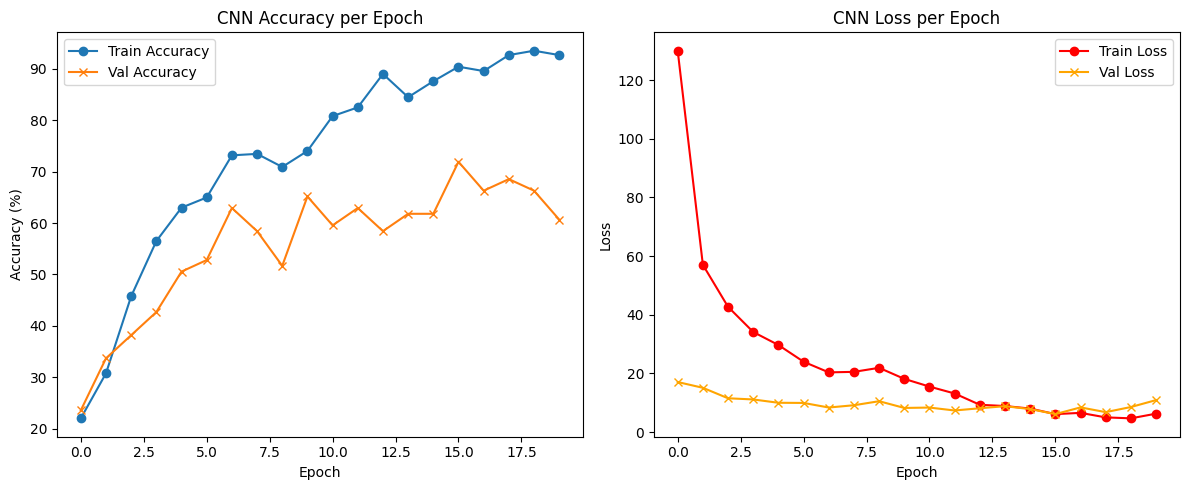

In [23]:
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(train_acc, label="Train Accuracy", marker='o')
plt.plot(val_acc, label="Val Accuracy", marker='x')
plt.title("CNN Accuracy per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(train_loss, label="Train Loss", marker='o', color='red')
plt.plot(val_loss, label="Val Loss", marker='x', color='orange')
plt.title("CNN Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()


✅ CNN Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.50      1.00      0.67         2
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       0.40      1.00      0.57         2
           5       0.67      0.40      0.50         5
           6       0.50      0.50      0.50         2
           7       1.00      0.67      0.80         3
           8       0.00      0.00      0.00         0
           9       0.75      0.60      0.67         5
          10       0.00      0.00      0.00         1
          11       0.67      0.67      0.67         3
          12       1.00      1.00      1.00         1
          13       0.40      1.00      0.57         2
          14       1.00      0.50      0.67         6
          15       1.00      0.50      0.67         4
          16       0.25      0.50      0.33        

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

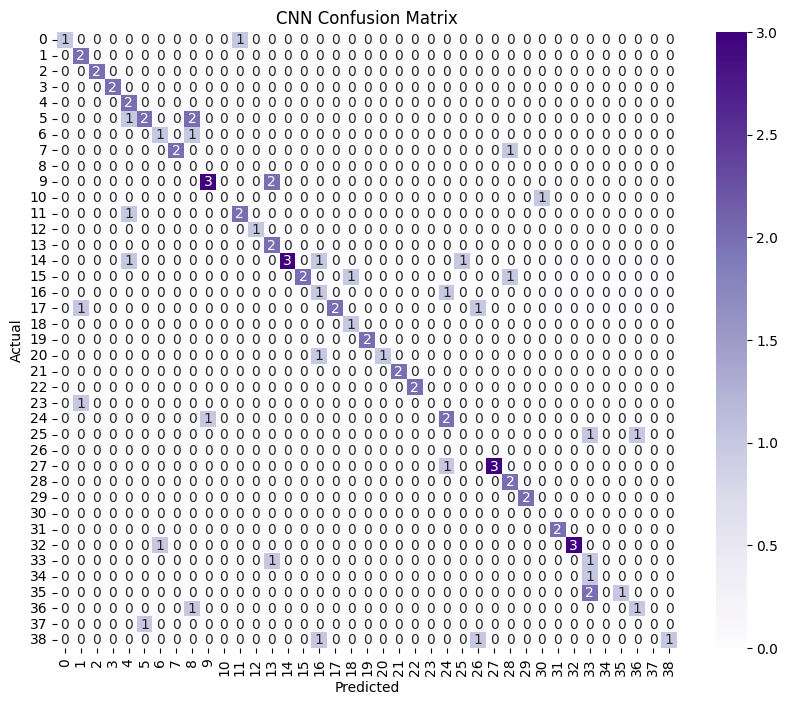

In [24]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Collect predictions and true labels
cnn_model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        outputs = cnn_model(images)
        _, predicted = torch.max(outputs.data, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.numpy())

# Classification Report
print("✅ CNN Classification Report:\n")
print(classification_report(all_labels, all_preds))

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap="Purples")
plt.title("CNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [31]:
!pip install gradio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 MB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 96.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 6.7 MB/s eta 0:00:00


In [32]:
import gradio as gr
from PIL import Image

def predict_leaf_gradio(image):
    image = image.convert('RGB')
    input_tensor = transform(image).unsqueeze(0).to(device)

    cnn_model.eval()
    with torch.no_grad():
        output = cnn_model(input_tensor)
        _, predicted = torch.max(output, 1)

    class_name = dataset.classes[predicted.item()]
    return f"🌿 Predicted Species: {class_name}"

iface = gr.Interface(
    fn=predict_leaf_gradio,
    inputs=gr.Image(type="pil"),
    outputs="text",
    title="Real-Time Leaf Identification System 🌿",
    description="Upload a leaf image and get its predicted species using a trained CNN model."
)

iface.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://fe15b7d5d3610f7ed5.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
